In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#https://www.kaggle.com/datasets/lucidlenn/sloan-digital-sky-survey

In [6]:
df = pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv")

In [7]:
df.head()

objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18    STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17    STAR -0.000055    323   
2  16.80125  752    301       4    268  3.232740e+17  GALAXY  0.123111    287   
3  15.90438  752    301       4    269  3.722370e+18    STAR -0.000111   3306   
4  16.61326  752    301       4    269  3.722370e+18    STAR  0.000590   3306   

     mjd  fiberid  
0  54922      491  
1  51615      541  
2  52023      513  
3  54922      510  
4  54922      512

In [8]:
columns_to_drop = ["objid", "specobjid", "run", "rerun", "camcol", "field"]

In [9]:
df.drop(columns_to_drop, axis=1, inplace=True)

In [10]:
df.head()

ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

    class  redshift  plate    mjd  fiberid  
0    STAR -0.000009   3306  54922      491  
1    STAR -0.000055    323  51615      541  
2  GALAXY  0.123111    287  52023      513  
3    STAR -0.000111   3306  54922      510  
4    STAR  0.000590   3306  54922      512

In [12]:
df["class"].value_counts()

class
GALAXY    4998
STAR      4152
QSO        850
Name: count, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   class     10000 non-null  object 
 8   redshift  10000 non-null  float64
 9   plate     10000 non-null  int64  
 10  mjd       10000 non-null  int64  
 11  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 937.6+ KB


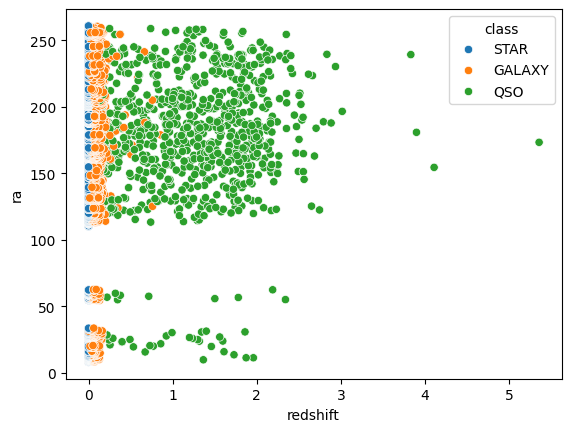

In [13]:
sns.scatterplot(data=df, x="redshift", y="ra", hue="class")
plt.show()

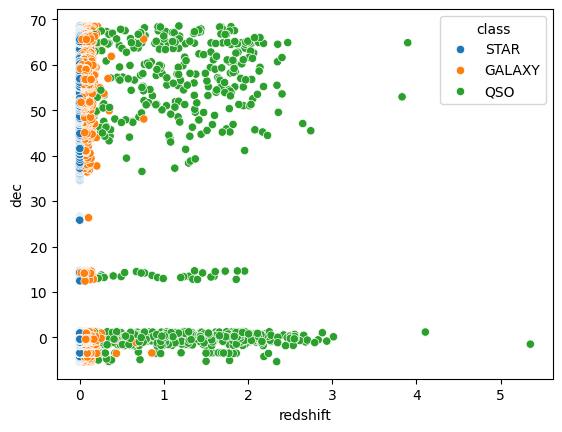

In [14]:
sns.scatterplot(data=df, x="redshift", y="dec", hue="class")
plt.show()

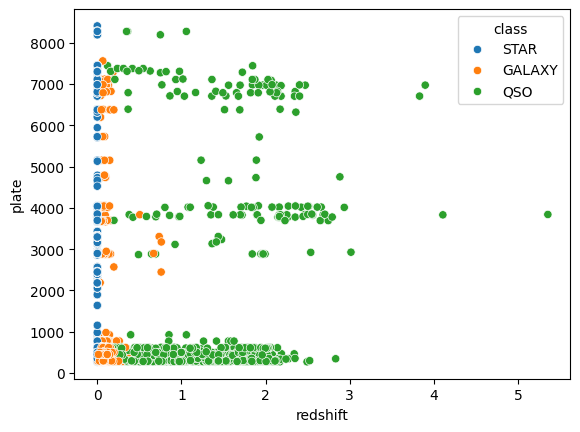

In [15]:
sns.scatterplot(data=df, x="redshift", y="plate", hue="class")
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
df["class"] = le.fit_transform(df["class"])

In [20]:
df.head()

ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

   class  redshift  plate    mjd  fiberid  
0      2 -0.000009   3306  54922      491  
1      2 -0.000055    323  51615      541  
2      0  0.123111    287  52023      513  
3      2 -0.000111   3306  54922      510  
4      2  0.000590   3306  54922      512

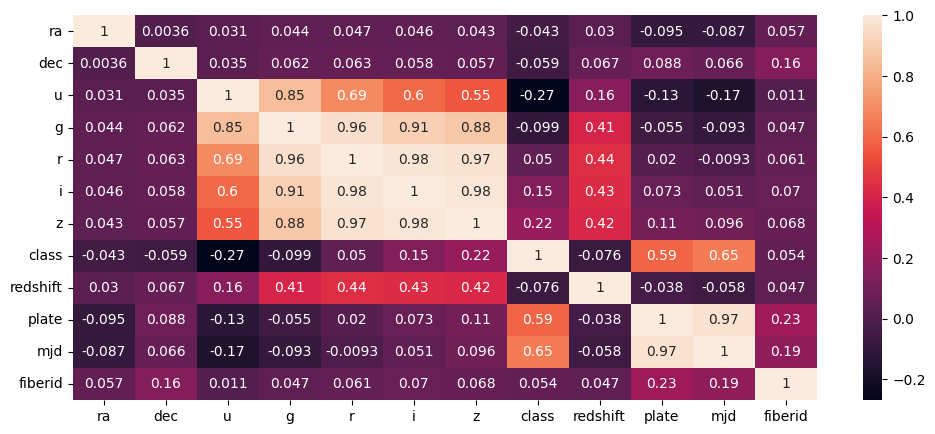

In [22]:
plt.figure(figsize=(12, 5))
sns.heatmap(df.corr(), annot=True)
plt.show()

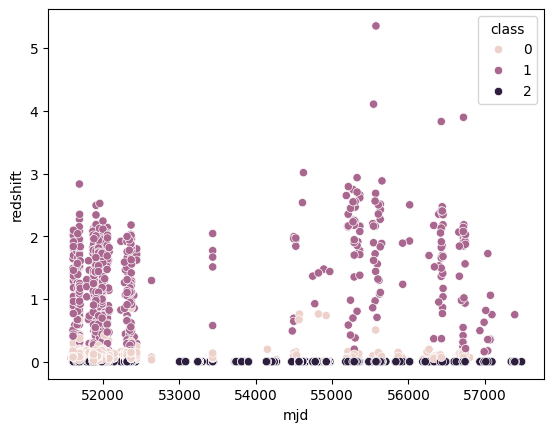

In [23]:
sns.scatterplot(data=df, x="mjd", y="redshift", hue="class")
plt.show()

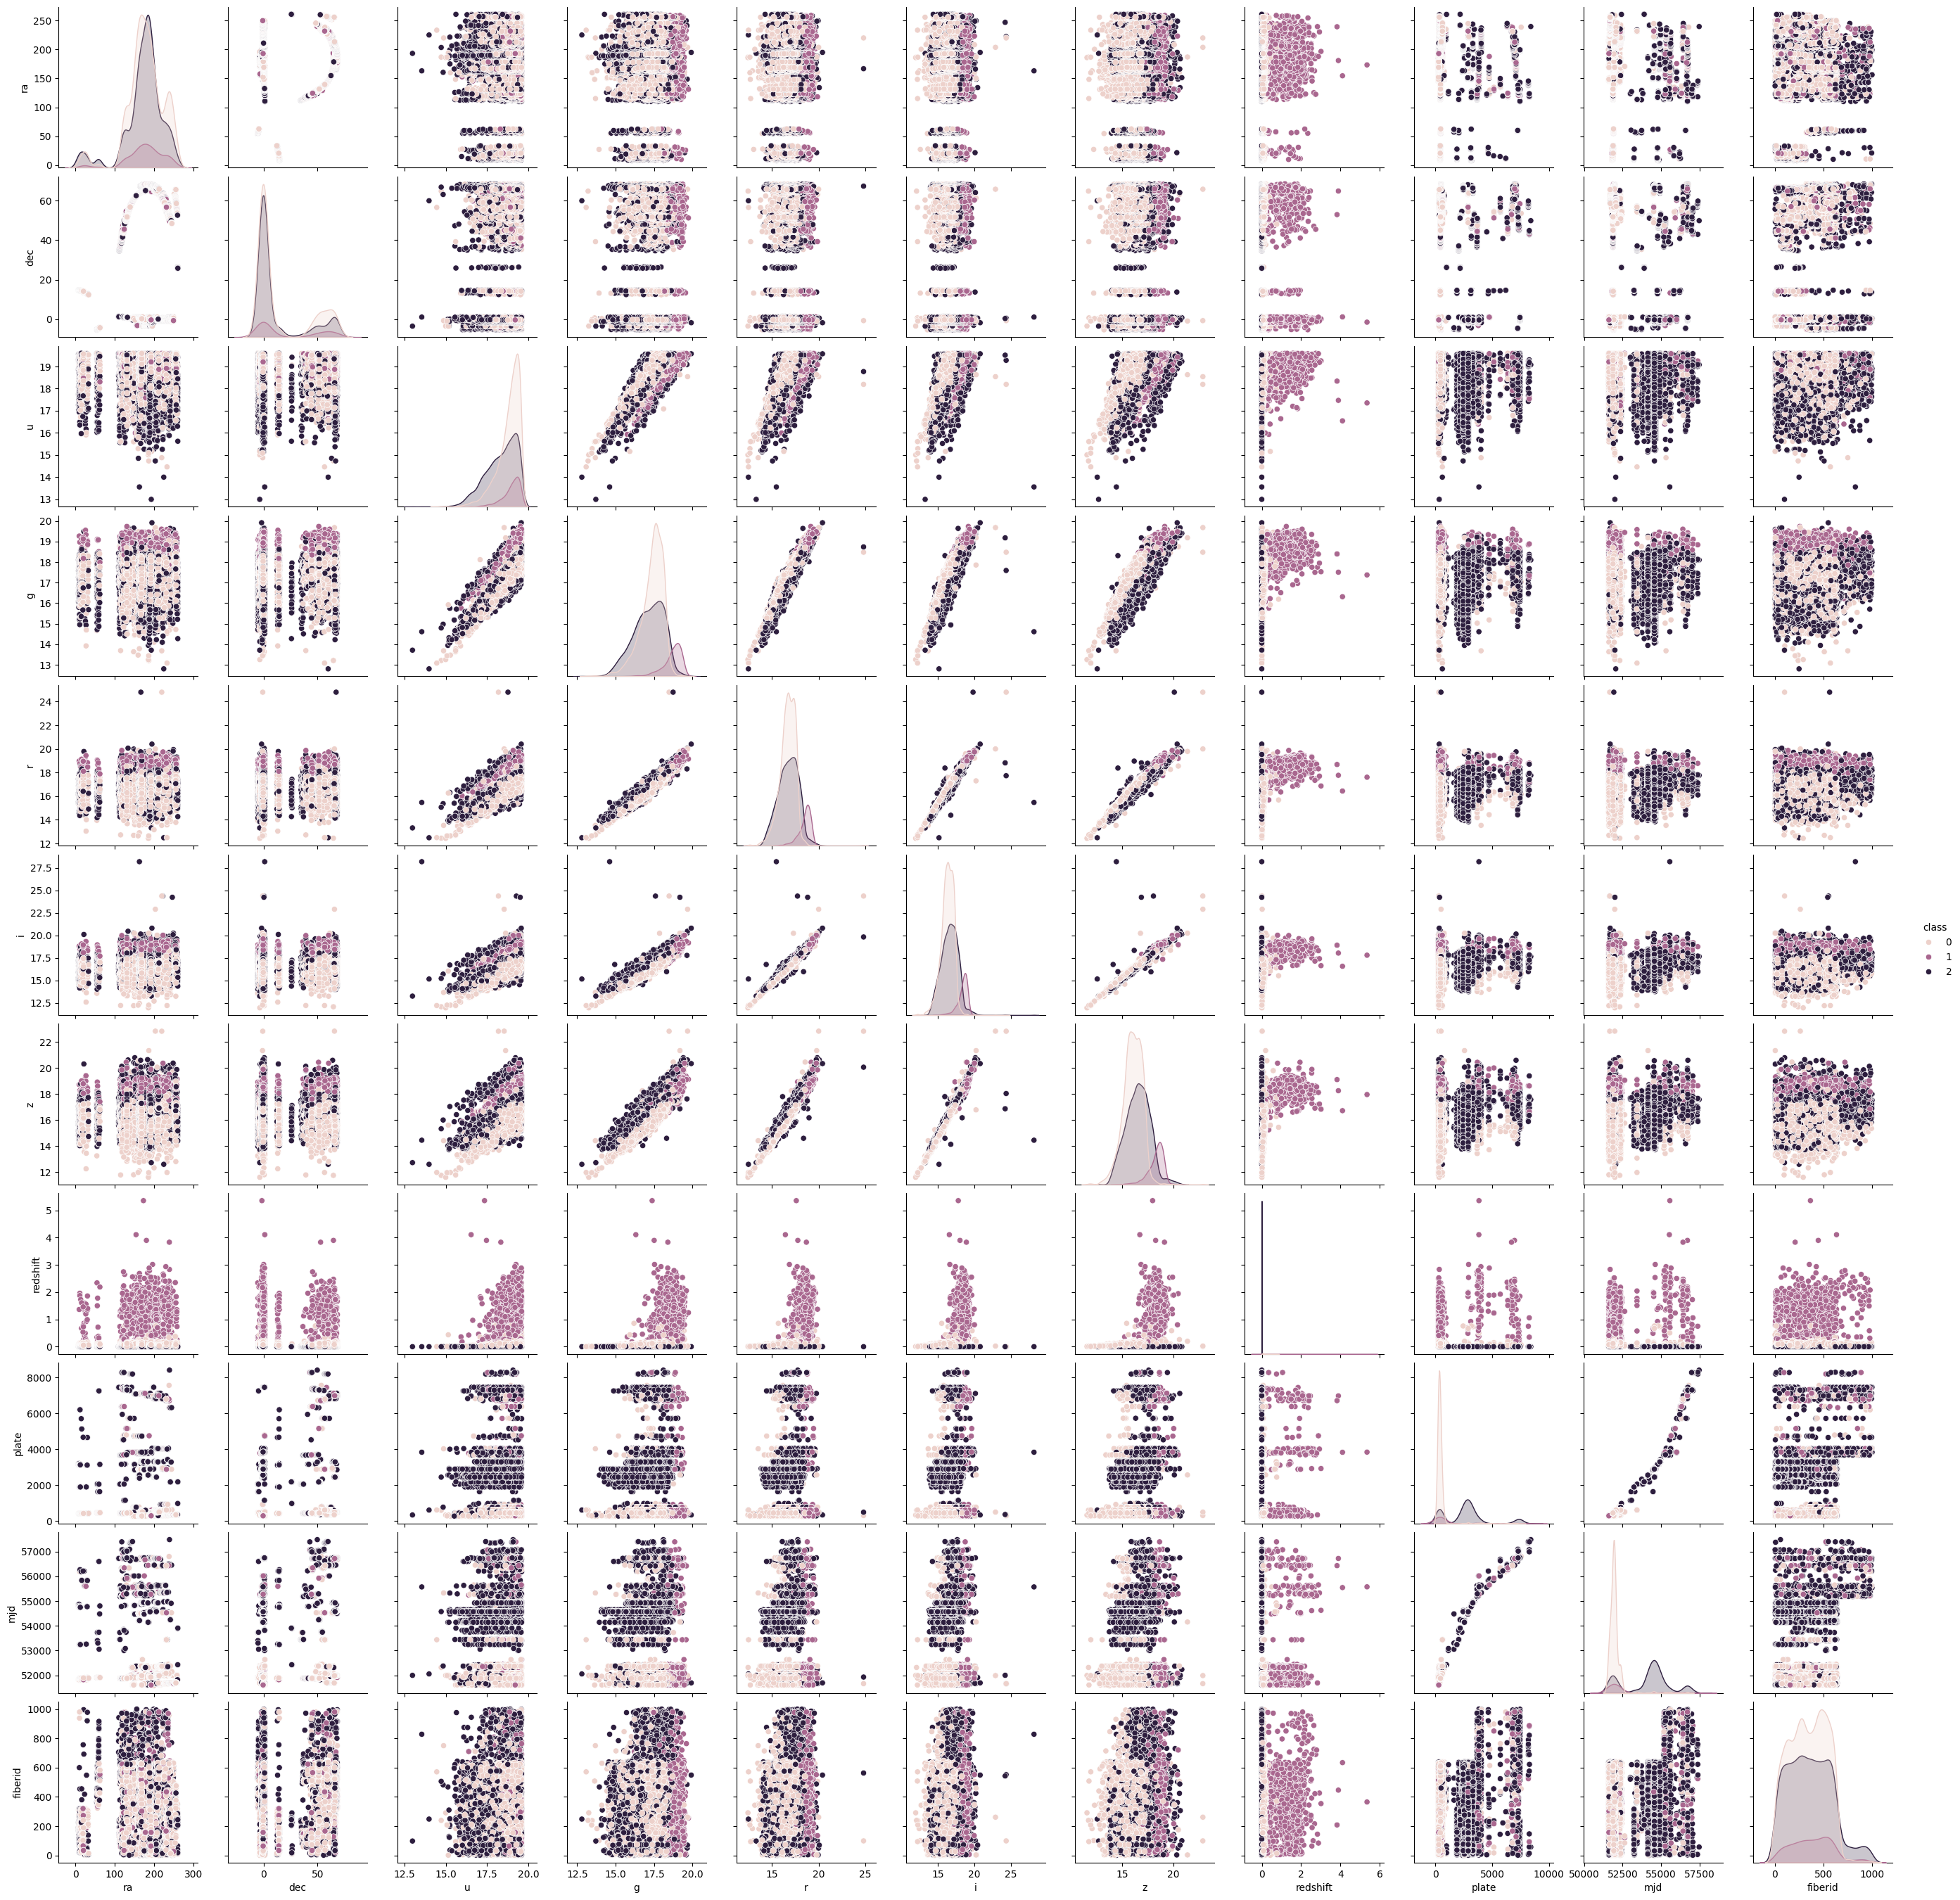

In [24]:
sns.pairplot(df, hue="class")
plt.show()

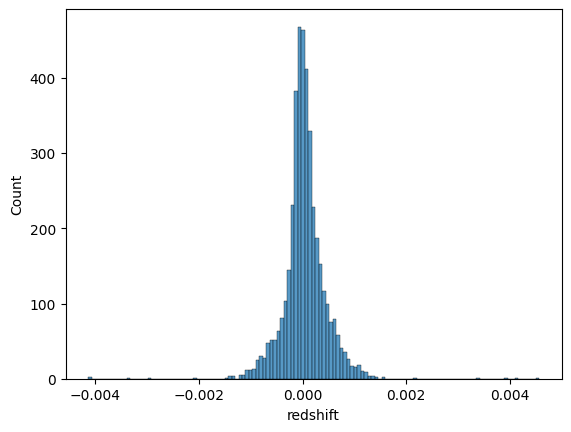

In [25]:
sns.histplot(df[df["class"] == 2]["redshift"])

plt.show()

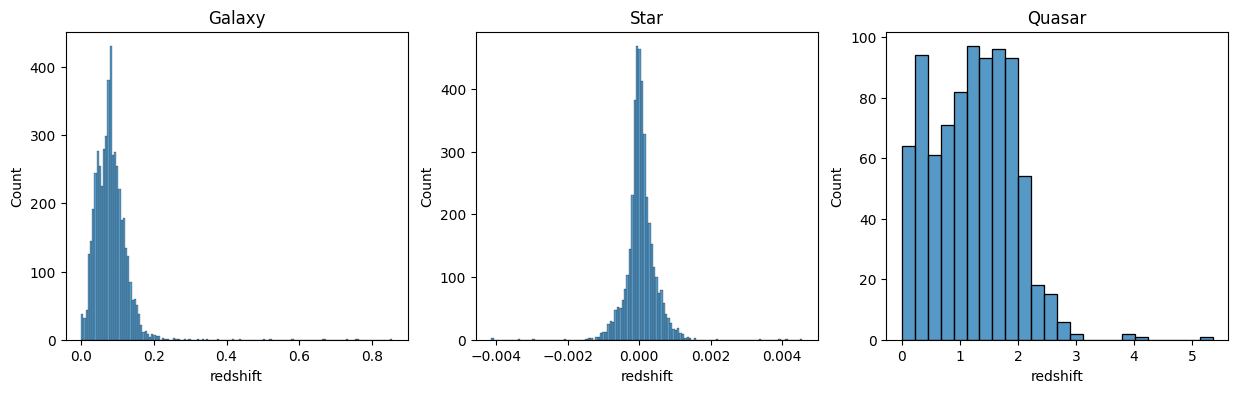

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax = sns.histplot(df[df["class"] == 0]["redshift"], ax=axes[0])
ax.set_title("Galaxy")

ax = sns.histplot(df[df["class"] == 2]["redshift"], ax=axes[1])
ax.set_title("Star")

ax = sns.histplot(df[df["class"] == 1]["redshift"], ax=axes[2])
ax.set_title("Quasar")

plt.show()

In [35]:
X = df.drop("class", axis=1)

y = df["class"]

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

In [39]:
scaler = StandardScaler()

In [40]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
from xgboost import XGBClassifier

In [42]:
xgb = XGBClassifier(n_estimators=100)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9875757575757576
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1687
           1       0.95      0.93      0.94       271
           2       0.99      1.00      1.00      1342

    accuracy                           0.99      3300
   macro avg       0.98      0.97      0.98      3300
weighted avg       0.99      0.99      0.99      3300

[[1667   13    7]
 [  17  253    1]
 [   3    0 1339]]


In [45]:
param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "learning_rate": [0.01, 0.1],
    "max_depth": [5, 8, 12, 20],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.8, 1]
}

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
grid = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, scoring="accuracy")

In [48]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.8, 1],
                         'learning_rate': [0.01, 0.1],
                         'max_depth': [5, 8, 12, 20],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='accuracy')

In [49]:
grid.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 500}

In [50]:
y_pred = grid.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9884848484848485
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1687
           1       0.96      0.93      0.94       271
           2       0.99      1.00      1.00      1342

    accuracy                           0.99      3300
   macro avg       0.98      0.97      0.98      3300
weighted avg       0.99      0.99      0.99      3300

[[1669   11    7]
 [  18  252    1]
 [   1    0 1341]]
